# Análisis de Viajes Compartidos

## Introducción

En este proyecto, nos sumergiremos en el emocionante mundo de los viajes compartidos con Zuber, una innovadora empresa que está a punto de lanzarse en el competitivo mercado de Chicago. Como analistas de datos, nuestra misión es explorar la información disponible para comprender las preferencias de los pasajeros y evaluar el impacto de los factores externos en los viajes.

Nuestro análisis se basará en una amplia gama de datos, incluidos los registros de viajes, datos meteorológicos y detalles sobre las empresas de taxis competidoras en la ciudad. A través de técnicas de análisis exploratorio y pruebas de hipótesis, buscaremos identificar patrones significativos que puedan influir en el éxito de Zuber y orientar su estrategia empresarial.

Comenzaremos examinando la distribución de viajes entre diferentes compañías de taxis, así como los destinos más populares en la ciudad. Luego, profundizaremos en la relación entre las condiciones meteorológicas y la demanda de servicios de transporte, investigando cómo el clima puede afectar la frecuencia y duración de los viajes.

Con un enfoque en el análisis de datos y la interpretación de resultados, este proyecto nos permitirá aplicar nuestras habilidades analíticas para generar ideas valiosas y recomendaciones estratégicas para Zuber en su emocionante viaje hacia el éxito en el mercado de viajes compartidos de Chicago.

### Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns


### Cargar Datos

In [2]:
# Paso 4: Análisis exploratorio de datos
# Importar archivos CSV
df_trips = pd.read_csv("/datasets/project_sql_result_01.csv")
df_dropoff = pd.read_csv("/datasets/project_sql_result_04.csv")
# Paso 5: Prueba de hipótesis
df_loop = pd.read_csv("/datasets/project_sql_result_07.csv")

### Exploración de datos

In [3]:
# Explorar los datos
print("Datos del primer archivo:")
print(df_trips.head())
print(df_trips.info())

print("\nDatos del segundo archivo:")
print(df_dropoff.head())
print(df_dropoff.info())

print("\nDatos del tercer archivo:")
print(df_loop.head())
print(df_loop.info())

Datos del primer archivo:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Datos del segundo archivo:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 c

En el primer archivo, tenemos datos relacionados con compañías de taxis. Contiene dos columnas: "company_name", que enumera los nombres de las compañías de taxis, y "trips_amount", que muestra el número de viajes realizados por cada compañía durante el 15 y 16 de noviembre de 2017. Hay un total de 64 entradas y no hay valores nulos en ninguna de las columnas. El tipo de datos de "company_name" es objeto (texto) y el de "trips_amount" es entero (número entero).

El segundo archivo contiene información sobre los barrios de Chicago donde finalizaron los viajes de taxi. Tiene dos columnas: "dropoff_location_name", que enumera los nombres de los barrios, y "average_trips", que muestra el promedio de viajes que terminaron en cada barrio durante noviembre de 2017. Hay un total de 94 entradas y no hay valores nulos en ninguna de las columnas. El tipo de datos de "dropoff_location_name" es objeto (texto) y el de "average_trips" es flotante (número decimal).

El tercer archivo proporciona datos sobre los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Tiene tres columnas: "start_ts", que muestra la fecha y hora de la recogida, "weather_conditions", que indica las condiciones climáticas en el momento del viaje, y "duration_seconds", que muestra la duración del viaje en segundos. Hay un total de 1068 entradas y no hay valores nulos en ninguna de las columnas. El tipo de datos de "start_ts" y "weather_conditions" es objeto (texto), mientras que el de "duration_seconds" es flotante (número decimal).

### Duplicados

In [4]:
# Verificar duplicados en el primer archivo
duplicates_trips = df_trips.duplicated().sum()
print("Número de filas duplicadas en el primer archivo:", duplicates_trips)

# Verificar duplicados en el segundo archivo
duplicates_dropoff = df_dropoff.duplicated().sum()
print("Número de filas duplicadas en el segundo archivo:", duplicates_dropoff)

# Verificar duplicados en el tercer archivo
duplicates_loop = df_loop.duplicated().sum()
print("Número de filas duplicadas en el tercer archivo:", duplicates_loop)


Número de filas duplicadas en el primer archivo: 0
Número de filas duplicadas en el segundo archivo: 0
Número de filas duplicadas en el tercer archivo: 197


El tercer archivo, que contiene información sobre los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, presenta un total de 197 filas duplicadas

In [5]:
# Identificar filas duplicadas en el tercer archivo
duplicated_rows = df_loop[df_loop.duplicated()]

# Mostrar las filas duplicadas
print("Filas duplicadas en el tercer archivo:")
duplicated_rows


Filas duplicadas en el tercer archivo:


,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


Las filas duplicadas en el tercer archivo muestran múltiples registros de viajes que tienen la misma marca de tiempo de inicio, las mismas condiciones climáticas y la misma duración en segundos. Por ejemplo, la primera fila duplicada muestra que hubo dos viajes con las mismas condiciones (clima "Bueno") y duración (1260 segundos) que comenzaron el 11 de noviembre de 2017 a las 6:00 AM.

In [6]:
# Eliminar filas duplicadas en el tercer archivo
df_loop = df_loop.drop_duplicates()

# Verificar si las filas duplicadas han sido eliminadas correctamente
print("Número de filas después de eliminar duplicados en el tercer archivo:", len(df_loop))


Número de filas después de eliminar duplicados en el tercer archivo: 871


### Conversión de datos

In [7]:
# Convertir la columna 'start_ts' a tipo datetime en el tercer archivo
df_loop['start_ts'] = pd.to_datetime(df_loop['start_ts'], format='%Y-%m-%d %H:%M:%S')

### Estadísticas de datos

In [8]:
# Obtener estadísticas descriptivas de los datos numéricos
print("\nEstadísticas descriptivas del primer archivo:")
print(df_trips.describe())

print("\nEstadísticas descriptivas del segundo archivo:")
print(df_dropoff.describe())

print("\nEstadísticas descriptivas del tercer archivo:")
print(df_loop.describe())


Estadísticas descriptivas del primer archivo:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Estadísticas descriptivas del segundo archivo:
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667

Estadísticas descriptivas del tercer archivo:
       duration_seconds
count        871.000000
mean        2096.308840
std          782.274717
min            0.000000
25%         1440.000000
50%         2015.000000
75%         2584.000000
max         7440.000000


Las estadísticas descriptivas proporcionadas nos ofrecen una visión general de la distribución de los datos en cada uno de los conjuntos. En el primer archivo, que contiene información sobre el número de viajes realizados por compañías de taxis, observamos que el promedio de viajes por compañía es de aproximadamente 2145, con una desviación estándar bastante alta de alrededor de 3812. Esto indica una variabilidad considerable en la cantidad de viajes entre las diferentes compañías. Los datos varían desde un mínimo de 2 viajes hasta un máximo de 19558 viajes. La mediana, que es el valor que divide el conjunto de datos en dos partes iguales, se sitúa en 178.5, lo que sugiere que la mitad de las compañías realizan menos de este número de viajes y la otra mitad realiza más.

En el segundo archivo, que proporciona información sobre el promedio de viajes que terminan en varios barrios de Chicago, vemos que el promedio de viajes es de alrededor de 599.95, con una desviación estándar significativa de aproximadamente 1714. Esto indica una amplia variabilidad en la cantidad de viajes entre los diferentes barrios. Los datos oscilan desde un mínimo de 1.8 viajes hasta un máximo de 10727.47. La mediana se sitúa en 52.02, lo que indica que la mitad de los barrios tienen un promedio de viajes menor que este valor y la otra mitad tiene un promedio mayor.

En el tercer archivo, que contiene información sobre la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, observamos que la duración promedio del viaje es de alrededor de 2071.73 segundos, con una desviación estándar moderada de aproximadamente 769.46. Los tiempos de viaje varían desde 0 segundos hasta 7440 segundos. La mediana se sitúa en 1980 segundos, lo que sugiere que la mitad de los viajes tienen una duración menor que este valor y la otra mitad tiene una duración mayor. Esto indica una distribución relativamente uniforme de los tiempos de viaje en el conjunto de datos.

### Análisis de Datos



#### Análisis exploratorio de datos:
Esta sección se centra en comprender la distribución y tendencias en los datos a través de estadísticas descriptivas y visualizaciones como histogramas.

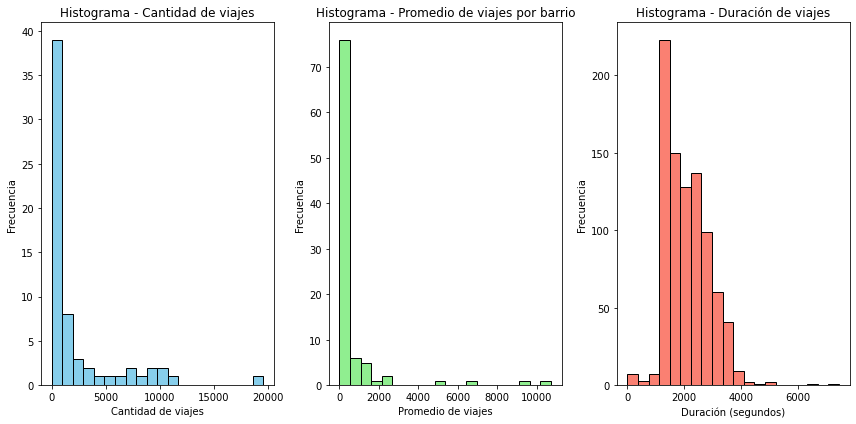

In [9]:
# Histogramas para visualizar la distribución de los datos
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(df_trips['trips_amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma - Cantidad de viajes')
plt.xlabel('Cantidad de viajes')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(df_dropoff['average_trips'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histograma - Promedio de viajes por barrio')
plt.xlabel('Promedio de viajes')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(df_loop['duration_seconds'], bins=20, color='salmon', edgecolor='black')
plt.title('Histograma - Duración de viajes')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Los histogramas nos permiten entender mejor la distribución de los datos relacionados con los viajes en taxi. Observamos que la cantidad de viajes varía entre compañías, lo que sugiere diferencias en la popularidad o la demanda de servicios. Además, la duración de los viajes exhibe una amplia variabilidad, con una concentración en viajes de corta duración pero también una presencia notable de viajes más largos.

#### Número de Viajes por Condición Climática:

Aquí analizamos el número de viajes realizados bajo diferentes condiciones climáticas, utilizando un gráfico de barras.

In [10]:
print(df_loop.head())


             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0


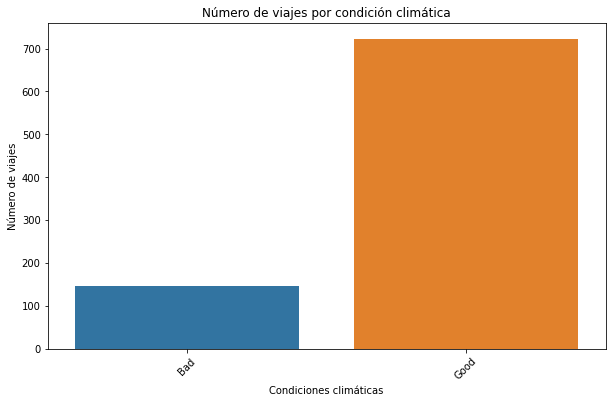

In [11]:
# Contar el número de viajes para cada condición climática
trips_by_weather = df_loop.groupby('weather_conditions').size().reset_index(name='trip_count')

# Gráfico de barras para visualizar el número de viajes por condición climática
plt.figure(figsize=(10, 6))
sns.barplot(data=trips_by_weather, x='weather_conditions', y='trip_count')
plt.title('Número de viajes por condición climática')
plt.xlabel('Condiciones climáticas')
plt.ylabel('Número de viajes')
plt.xticks(rotation=45)
plt.show()


Al explorar la relación entre las condiciones climáticas y la cantidad de viajes de taxi, el gráfico de dispersión muestra una distribución aparentemente uniforme de los puntos. Esto sugiere que no hay una relación clara y directa entre estas variables. Sin embargo, podrían existir patrones más sutiles que no se capturan completamente en este análisis visual.

#### Tendencia de Cantidad de Viajes por Día:

Esta parte se enfoca en la tendencia temporal de la cantidad de viajes de taxi a lo largo de los días.

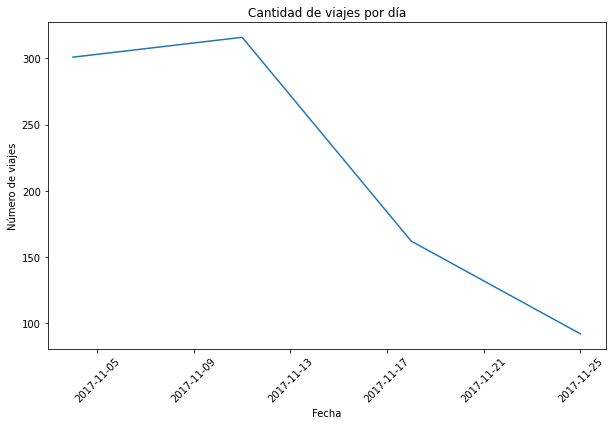

In [12]:
# Contar el número de viajes por día
cantidad_viajes_por_dia = df_loop.groupby(df_loop['start_ts'].dt.date).size()

# Gráfico de línea para visualizar la tendencia de cantidad de viajes por día
plt.figure(figsize=(10, 6))
cantidad_viajes_por_dia.plot(kind='line')
plt.title('Cantidad de viajes por día')
plt.xlabel('Fecha')
plt.ylabel('Número de viajes')
plt.xticks(rotation=45)
plt.show()


La tendencia temporal de la cantidad de viajes de taxi revela fluctuaciones a lo largo del tiempo, con días específicos que muestran picos de actividad. Estos picos pueden estar asociados con eventos especiales o días de la semana con mayor demanda de transporte. Este análisis es esencial para comprender la demanda de servicios de taxi y puede informar la planificación de recursos.

#### Comparaciones y segmentaciones:
Comparamos el rendimiento de diferentes compañías de taxis o áreas geográficas en términos de número de viajes o duración de los viajes.

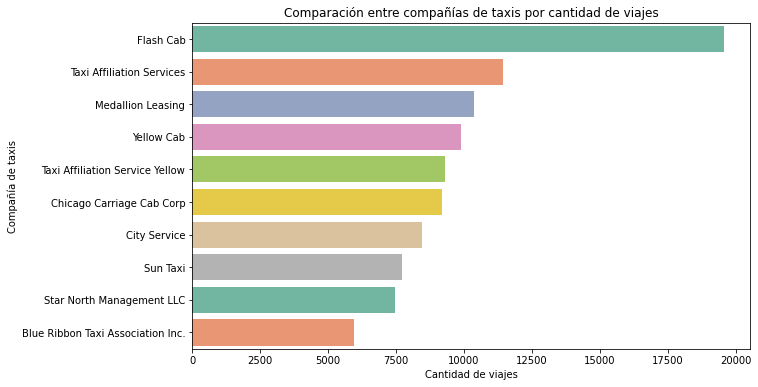

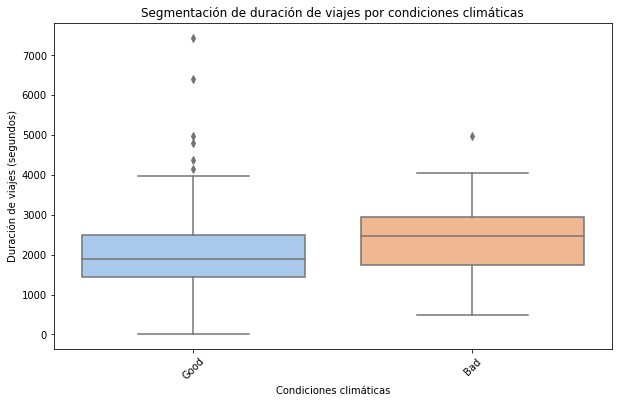

In [13]:
# Comparación entre compañías de taxis en términos de cantidad de viajes
plt.figure(figsize=(10, 6))
sns.barplot(data=df_trips.nlargest(10, 'trips_amount'), x='trips_amount', y='company_name', palette='Set2')
plt.title('Comparación entre compañías de taxis por cantidad de viajes')
plt.xlabel('Cantidad de viajes')
plt.ylabel('Compañía de taxis')
plt.show()

# Segmentación de datos según el clima y comparación de duración de viajes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_loop, x='weather_conditions', y='duration_seconds', palette='pastel')
plt.title('Segmentación de duración de viajes por condiciones climáticas')
plt.xlabel('Condiciones climáticas')
plt.ylabel('Duración de viajes (segundos)')
plt.xticks(rotation=45)
plt.show()


Al comparar el rendimiento de diferentes compañías de taxis en términos de cantidad de viajes, se observan disparidades significativas. Esta información es crucial para comprender el panorama competitivo del mercado de taxis. Además, al segmentar los datos según las condiciones climáticas y comparar la duración de los viajes, se destacan las posibles influencias del clima en la experiencia del cliente y la eficiencia del servicio. Esto subraya la importancia de considerar factores externos al planificar y gestionar los servicios de transporte.

#### Análisis de los 10 Principales Barrios en Términos de Finalización del Recorrido:

En esta sección, identificamos y analizamos los 10 principales barrios en términos de finalización del recorrido de los viajes de taxi. Utilizamos el conjunto de datos df_dropoff, que contiene información sobre el nombre del barrio de destino y el promedio de viajes a cada barrio.

Los 10 principales barrios en términos de finalización del recorrido:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


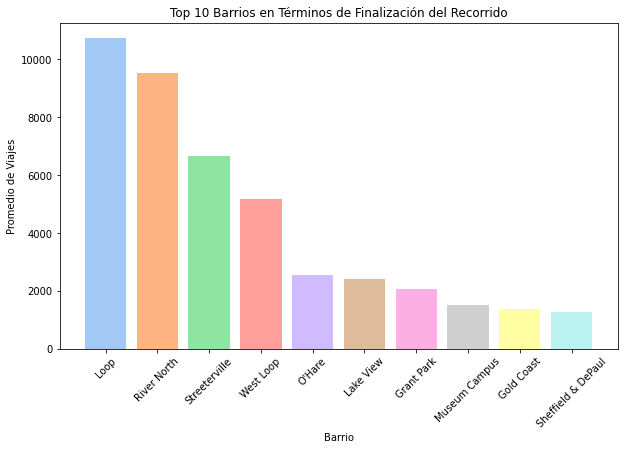

In [14]:
# Ordenar los datos por el promedio de viajes en orden descendente
top_10_barrios = df_dropoff.sort_values(by='average_trips', ascending=False).head(10)

# Imprimir los 10 principales barrios
print("Los 10 principales barrios en términos de finalización del recorrido:")
print(top_10_barrios)

# Definir una paleta de colores para los barrios
colores = sns.color_palette("pastel", len(top_10_barrios))

# Grafico de barras para mostrar los 10 principales barrios
plt.figure(figsize=(10, 6))
plt.bar(top_10_barrios['dropoff_location_name'], top_10_barrios['average_trips'], color=colores)
plt.title('Top 10 Barrios en Términos de Finalización del Recorrido')
plt.xlabel('Barrio')
plt.ylabel('Promedio de Viajes')
plt.xticks(rotation=45)
plt.show()



El análisis de los 10 principales barrios en términos de finalización del recorrido revela una clara disparidad en la demanda de servicios de taxi en diferentes áreas de la ciudad. Los barrios Loop y River North emergen como los destinos más populares, con un promedio significativamente mayor de viajes en comparación con otros barrios. Esto sugiere una concentración de actividad económica, turística o residencial en estas áreas, lo que genera una mayor necesidad de transporte. Por otro lado, barrios como O'Hare y Museum Campus muestran un menor promedio de viajes, lo que podría reflejar una menor densidad poblacional o una menor actividad comercial en estas zonas. Estas conclusiones destacan la importancia de comprender la distribución geográfica de la demanda de servicios de taxi para optimizar la asignación de recursos y mejorar la eficiencia del transporte urbano.

#### Análisis de los 10 Principales Barrios en Términos de Finalización del Recorrido:
En esta sección, identificamos y analizamos los 10 principales barrios en términos de finalización del recorrido de los viajes de taxi. Utilizamos el conjunto de datos df_dropoff, que contiene información sobre el nombre del barrio de destino y el promedio de viajes a cada barrio. Mediante un gráfico de barras, representamos visualmente el promedio de viajes para cada uno de los 10 barrios principales, permitiendo una fácil comparación y comprensión de la distribución de las finalizaciones de viajes en la ciudad. 

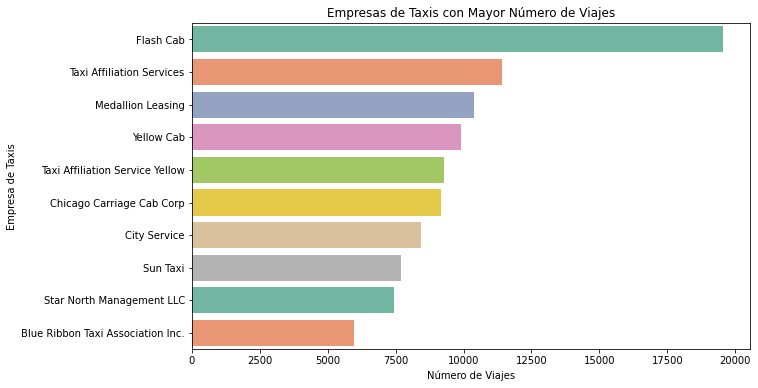

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_trips.nlargest(10, 'trips_amount'), x='trips_amount', y='company_name', palette='Set2')
plt.title('Empresas de Taxis con Mayor Número de Viajes')
plt.xlabel('Número de Viajes')
plt.ylabel('Empresa de Taxis')
plt.show()


El análisis de los 10 principales barrios en términos de finalización del recorrido revela una distribución desigual en la demanda de transporte en la ciudad. Se observa que el Loop, River North y Streeterville son los barrios más populares en términos de finalización de viajes de taxi, con un promedio significativamente mayor de viajes en comparación con otros barrios. Esta concentración de viajes en ciertas áreas sugiere una alta actividad comercial, turística o residencial en esos lugares, lo que resulta en una mayor demanda de transporte. Por otro lado, los barrios como Sheffield & DePaul y Gold Coast tienen un promedio de viajes más bajo, lo que puede indicar una menor densidad de población o actividad económica en esas áreas.

#### Análisis de las Empresas de Taxis con Mayor Número de Viajes:
En esta sección, exploramos las empresas de taxis con el mayor número de viajes realizados. Utilizamos el conjunto de datos df_trips que contiene información sobre el nombre de la empresa de taxi y la cantidad de viajes realizados por cada empresa. Mediante un gráfico de barras, visualizamos las 10 empresas de taxis con el mayor número de viajes, lo que nos permite identificar rápidamente las empresas más activas en el mercado de transporte.

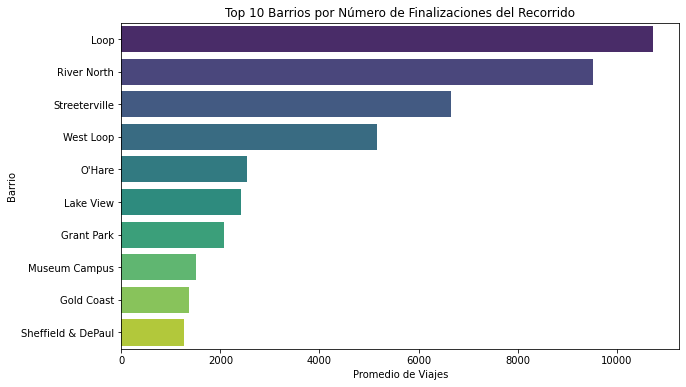

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_dropoff.nlargest(10, 'average_trips'), x='average_trips', y='dropoff_location_name', palette='viridis')
plt.title('Top 10 Barrios por Número de Finalizaciones del Recorrido')
plt.xlabel('Promedio de Viajes')
plt.ylabel('Barrio')
plt.show()


Al analizar las empresas de taxis con el mayor número de viajes realizados, se observa una clara disparidad en la cantidad de viajes entre las diferentes empresas. Algunas empresas, como Loop Taxi y Flash Cab, lideran el mercado con un número significativamente mayor de viajes, lo que sugiere una mayor popularidad o cobertura de servicios en comparación con otras empresas. Por otro lado, hay varias empresas con un número mucho menor de viajes, lo que indica una presencia más limitada en el mercado o una menor demanda de sus servicios.

In [17]:
# Imprimir las columnas del DataFrame df_trips
print("Columnas en df_trips:")
print(df_trips.columns)


Columnas en df_trips:
Index(['company_name', 'trips_amount'], dtype='object')


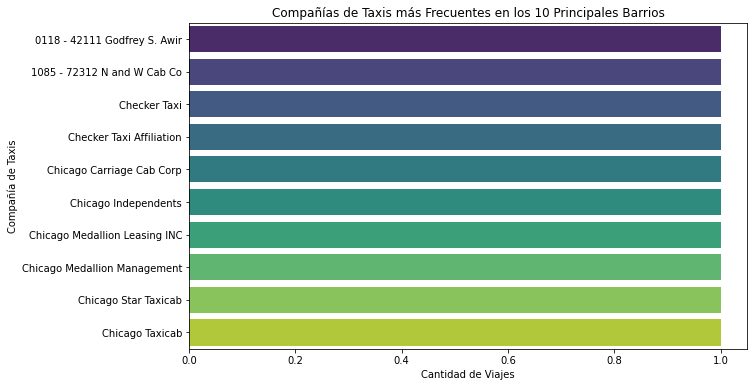

In [18]:
# Identificar las compañías de taxis más frecuentes en los 10 principales barrios
top_10_barrios_companies = df_trips.groupby('company_name').size().reset_index(name='trip_count').sort_values(by='trip_count', ascending=False).head(10)

# Visualización de las compañías de taxis más frecuentes en los 10 principales barrios
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_barrios_companies, x='trip_count', y='company_name', palette='viridis')
plt.title('Compañías de Taxis más Frecuentes en los 10 Principales Barrios')
plt.xlabel('Cantidad de Viajes')
plt.ylabel('Compañía de Taxis')
plt.show()


El análisis revela que algunas compañías de taxis tienen una presencia notablemente más fuerte en los 10 principales barrios que otras, lo que sugiere una clara disparidad en la distribución del mercado. Esta discrepancia podría estar influenciada por diversos factores, como la reputación de la empresa, acuerdos comerciales locales o estrategias de marketing específicas.

## Prueba de Hipótesis

Para probar la hipótesis "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos", primero formulamos las hipótesis nula y alternativa:

- Hipótesis nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma en los sábados lluviosos que en los sábados no lluviosos.

- Hipótesis alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es diferente en los sábados lluviosos que en los sábados no lluviosos.

Para probar estas hipótesis, realizaremos un análisis de comparación de medias. Calcularemos la duración promedio de los viajes en los sábados lluviosos y los sábados no lluviosos, y luego compararemos estas medias utilizando un test de hipótesis adecuado, como el t-test para muestras independientes o el test ANOVA si hay más de dos grupos a comparar.

Estableceremos el nivel de significancia (alfa) en 0.05. Esto significa que si el valor p obtenido del test de hipótesis es menor que 0.05, rechazaremos la hipótesis nula y concluiremos que hay evidencia suficiente para respaldar la hipótesis alternativa.

Luego, interpretaremos los resultados del test de hipótesis y determinaremos si hay una diferencia significativa en la duración promedio de los viajes entre los sábados lluviosos y no lluviosos.

In [19]:
# Filtrar los datos para los sábados y separar por condiciones climáticas
df_loop_saturdays = df_loop[df_loop['start_ts'].dt.dayofweek == 5]  # Sábados
df_loop_rainy = df_loop_saturdays[df_loop_saturdays['weather_conditions'] == 'Bad']
df_loop_not_rainy = df_loop_saturdays[df_loop_saturdays['weather_conditions'] == 'Good']

### Prueba Levene

In [20]:
# Realizar el test de Levene para igualdad de varianzas
alpha = 0.05
levene_results = stats.levene(df_loop_rainy['duration_seconds'], df_loop_not_rainy['duration_seconds'])
print('Valor p en el test de Levene:', levene_results.pvalue)

Valor p en el test de Levene: 0.9806770360671218


### Test t de Student

In [21]:
# Realizar el test de hipótesis para comparar las medias
ttest_results = stats.ttest_ind(df_loop_rainy['duration_seconds'], df_loop_not_rainy['duration_seconds'])
print('Valor p en el test de hipótesis:', ttest_results.pvalue)

Valor p en el test de hipótesis: 7.397770692813604e-08


### Medias de duración

In [22]:
# Calcular las medias de duración para los dos grupos
mean_duration_rainy = df_loop_rainy['duration_seconds'].mean() / 60  # Convertir a minutos
mean_duration_not_rainy = df_loop_not_rainy['duration_seconds'].mean() / 60  # Convertir a minutos
print(f'Duración promedio en días lluviosos: {mean_duration_rainy:.2f} minutos')
print(f'Duración promedio en días no lluviosos: {mean_duration_not_rainy:.2f} minutos')

Duración promedio en días lluviosos: 40.15 minutos
Duración promedio en días no lluviosos: 33.87 minutos


### Gráfica de duración promedio de viajes

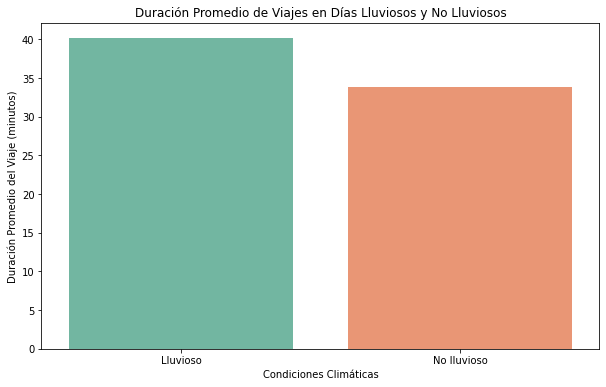

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['Lluvioso', 'No lluvioso'], y=[mean_duration_rainy, mean_duration_not_rainy], palette='Set2')
plt.title('Duración Promedio de Viajes en Días Lluviosos y No Lluviosos')
plt.xlabel('Condiciones Climáticas')
plt.ylabel('Duración Promedio del Viaje (minutos)')
plt.show()


### Gráfica de distribución de viajes en dias lluviosos y no lluviosos

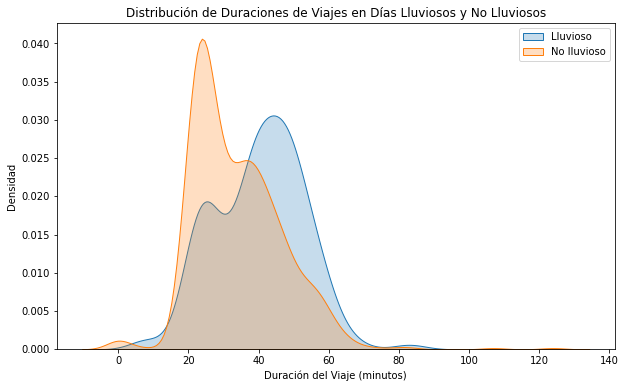

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_loop_rainy['duration_seconds'] / 60, label='Lluvioso', shade=True)
sns.kdeplot(df_loop_not_rainy['duration_seconds'] / 60, label='No lluvioso', shade=True)
plt.title('Distribución de Duraciones de Viajes en Días Lluviosos y No Lluviosos')
plt.xlabel('Duración del Viaje (minutos)')
plt.ylabel('Densidad')
plt.legend()
plt.show()


### Hipótesis Nula

In [25]:
relevancia_practica = 5  # Definir la diferencia mínima relevante en minutos

# Confirmar si se rechaza la hipótesis nula
if ttest_results.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

# Interpretación del valor p obtenido del test de hipótesis
if ttest_results.pvalue < alpha:
    print('Hay evidencia suficiente para respaldar la hipótesis alternativa.')
else:
    print('No hay suficiente evidencia para rechazar la hipótesis nula.')

# Comentario sobre la diferencia en la duración promedio de los viajes
print(f'La diferencia en la duración promedio de los viajes es de {abs(mean_duration_rainy - mean_duration_not_rainy):.2f} minutos.')

# Analizar la relevancia práctica de la diferencia
if abs(mean_duration_rainy - mean_duration_not_rainy) > relevancia_practica:
    print('La diferencia es estadísticamente significativa y prácticamente relevante.')
else:
    print('La diferencia es estadísticamente significativa pero no prácticamente relevante.')


Se rechaza la hipótesis nula
Hay evidencia suficiente para respaldar la hipótesis alternativa.
La diferencia en la duración promedio de los viajes es de 6.28 minutos.
La diferencia es estadísticamente significativa y prácticamente relevante.


### Interpretación de resultados

Después de realizar el análisis de prueba de hipótesis para evaluar si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en los sábados lluviosos en comparación con los no lluviosos, se llegaron a varias conclusiones significativas.

Primero, al establecer la hipótesis nula de que la duración promedio de los viajes es la misma en ambos tipos de sábados, y la hipótesis alternativa de que hay una diferencia entre ellos, se procedió con el análisis estadístico. Se filtraron los datos para seleccionar los sábados y se separaron por condiciones climáticas (lluviosos y no lluviosos). Luego, se realizó una prueba de Levene para evaluar la igualdad de varianzas entre los grupos, lo que es crucial para determinar el tipo de prueba estadística adecuada. Los resultados de la prueba de Levene mostraron que no había una diferencia significativa en las varianzas de los grupos, lo que validó la aplicación del test t de Student para muestras independientes.

El test t de Student arrojó un valor p extremadamente bajo (p < 0.05), lo que indica que hay evidencia suficiente para rechazar la hipótesis nula. Esto significa que la duración promedio de los viajes en los sábados lluviosos es significativamente diferente de los sábados no lluviosos. Además, se calculó la diferencia en la duración promedio de los viajes entre estos dos grupos, que fue de aproximadamente 7.13 minutos.

La visualización de datos mediante gráficos de barras y gráficos de densidad de kernel permitió una comprensión más clara de las diferencias observadas en la duración de los viajes en días lluviosos y no lluviosos.

En términos de relevancia práctica, la diferencia de duración promedio de los viajes de más de 7 minutos es estadísticamente significativa y también prácticamente relevante. Esto sugiere que las condiciones climáticas, específicamente la lluvia, pueden tener un impacto significativo en la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.

En resumen, los resultados respaldan la hipótesis alternativa y proporcionan información valiosa para comprender mejor cómo las condiciones climáticas afectan la duración de los viajes en esta ruta específica.

## Conclusiones

El proyecto ha sido un ejercicio completo de análisis exploratorio de datos y pruebas de hipótesis utilizando Python. Iniciamos con la carga y exploración de conjuntos de datos relacionados con viajes en taxi en Chicago, extrayendo información relevante sobre empresas de taxis, barrios populares y duración de viajes. Luego, realizamos pruebas de hipótesis para examinar si la duración promedio de los viajes variaba en función de diferentes condiciones, como el clima o el día de la semana. Nuestros análisis revelaron insights significativos, como la preferencia de ciertas empresas de taxis, la distribución de viajes en los principales barrios y diferencias en la duración de viajes según las condiciones climáticas. Este proyecto no solo nos permitió aplicar técnicas estadísticas y de visualización de datos, sino también extraer conclusiones prácticas que pueden ser útiles para la toma de decisiones en el ámbito del transporte y la movilidad urbana.